📊 Libraries loaded successfully!
🎯 Ready for Wuthering Waves Sentiment Analysis EDA
✅ Loaded dataset: ../data/processed\ml_ready_dataset_20250529_003526.csv
📊 Dataset shape: (5000, 10)

📋 Dataset Overview:
Total entries: 5000
Features: ['review_id', 'source', 'clean_text', 'sentiment', 'rating', 'text_length', 'word_count', 'exclamation_count', 'question_count', 'capital_ratio']

First 5 rows:
📊 DATASET BASIC STATISTICS
Dataset Shape: (5000, 10)
Memory Usage: 2.66 MB

🔍 Missing Values:
  ✅ No missing values!

📝 Data Types:
  review_id: object
  source: object
  clean_text: object
  sentiment: object
  rating: float64
  text_length: int64
  word_count: int64
  exclamation_count: int64
  question_count: int64
  capital_ratio: float64

📱 Source Distribution:
  google_play: 4446 (88.9%)
  reddit: 404 (8.1%)
  app_store: 150 (3.0%)

😊 Sentiment Distribution:
  Positive: 3407 (68.1%)
  Negative: 1277 (25.5%)
  Neutral: 316 (6.3%)


📝 TEXT ANALYSIS - LENGTH STATISTICS
📏 Text Length Statistics:
  Mean length: 248.0 characters
  Median length: 78.0 characters
  Min length: 6 characters
  Max length: 26004 characters
  Std deviation: 1079.3 characters

📝 Word Count Statistics:
  Mean words: 45.2 words
  Median words: 14.0 words
  Min words: 1 words
  Max words: 4883 words

📊 Text Length by Sentiment:
                 mean  median          std
sentiment                                 
negative   190.632733   109.0   311.195957
neutral    244.132911   157.0   712.072879
positive   269.890813    64.0  1274.629917


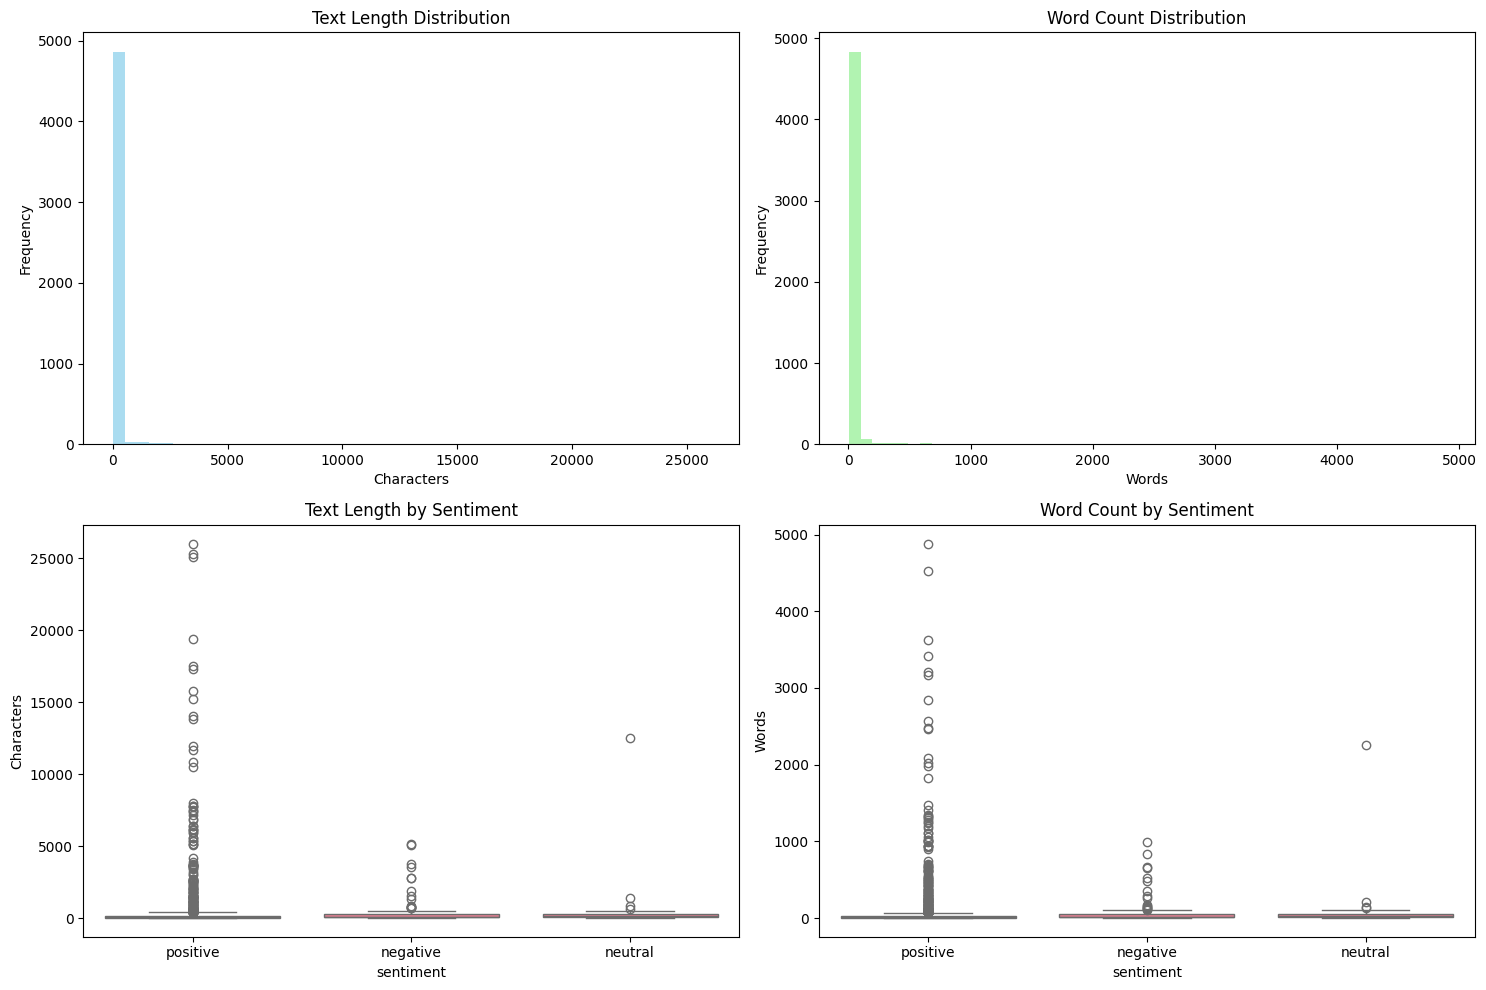

🔍 TEXT FEATURES ANALYSIS
❗ Exclamation Marks Analysis:
               mean   sum
sentiment                
negative   0.140955   180
neutral    0.136076    43
positive   0.355738  1212

❓ Question Marks Analysis:
               mean  sum
sentiment               
negative   0.194205  248
neutral    0.091772   29
positive   0.127972  436

🔤 Capital Letters Ratio Analysis:
               mean    median
sentiment                    
negative   0.035561  0.016055
neutral    0.030964  0.017362
positive   0.056291  0.019391


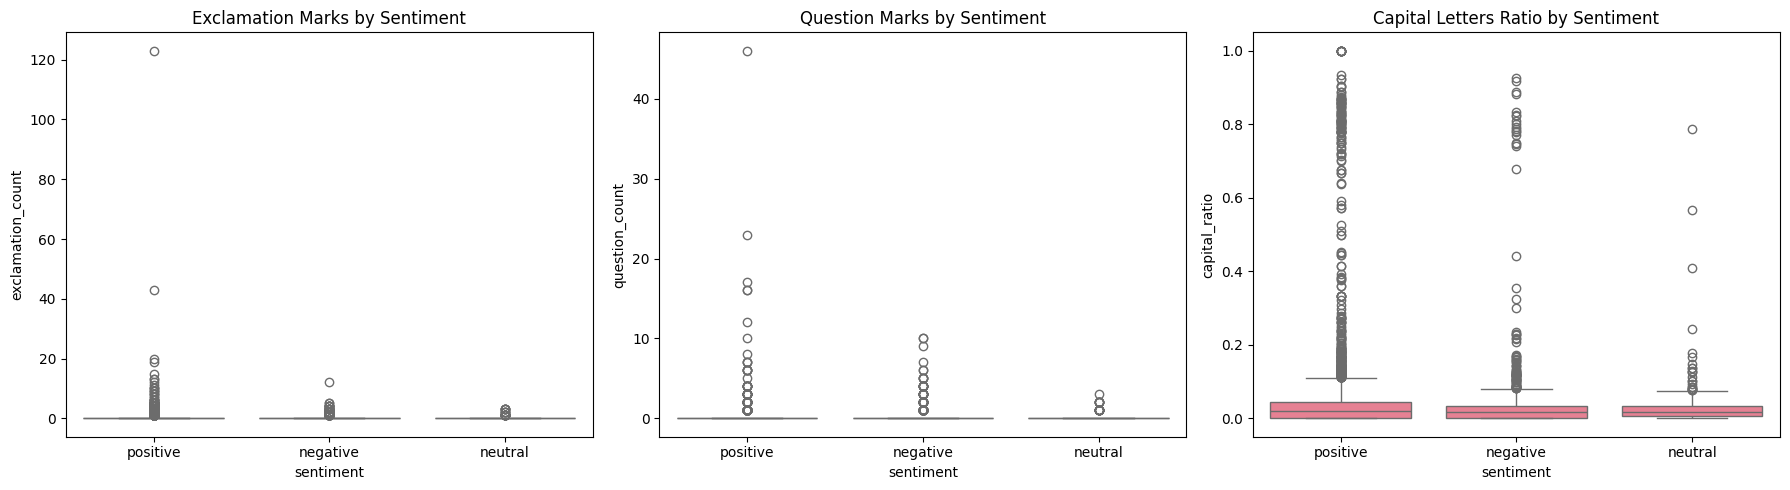

📝 WORD FREQUENCY ANALYSIS


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\ASUS/nltk_data'
    - 'c:\\Users\\ASUS\\AppData\\Local\\Programs\\Python\\Python312\\nltk_data'
    - 'c:\\Users\\ASUS\\AppData\\Local\\Programs\\Python\\Python312\\share\\nltk_data'
    - 'c:\\Users\\ASUS\\AppData\\Local\\Programs\\Python\\Python312\\lib\\nltk_data'
    - 'C:\\Users\\ASUS\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [1]:
# Wuthering Waves Sentiment Analysis - Exploratory Data Analysis
# ================================================================

# Cell 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Text analysis libraries
import re
from collections import Counter
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK data (run once)
try:
    nltk.data.find('tokenizers/punkt')
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('punkt')
    nltk.download('stopwords')

# Set style
plt.style.use('default')
sns.set_palette("husl")

print("📊 Libraries loaded successfully!")
print("🎯 Ready for Wuthering Waves Sentiment Analysis EDA")

# Cell 2: Load Processed Data
# Load the ML-ready dataset
data_path = '../data/processed/'
import glob
import os

# Find latest ML-ready dataset
ml_files = glob.glob(f"{data_path}ml_ready_dataset_*.csv")
if ml_files:
    latest_file = max(ml_files, key=os.path.getctime)
    df = pd.read_csv(latest_file)
    print(f"✅ Loaded dataset: {latest_file}")
    print(f"📊 Dataset shape: {df.shape}")
else:
    print("❌ ML-ready dataset not found!")

# Basic info
print(f"\n📋 Dataset Overview:")
print(f"Total entries: {len(df)}")
print(f"Features: {list(df.columns)}")
print(f"\nFirst 5 rows:")
df.head()

# Cell 3: Dataset Basic Statistics
print("📊 DATASET BASIC STATISTICS")
print("=" * 50)

# Basic info
print(f"Dataset Shape: {df.shape}")
print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Missing values
print(f"\n🔍 Missing Values:")
missing = df.isnull().sum()
if missing.sum() > 0:
    for col, count in missing[missing > 0].items():
        print(f"  {col}: {count} ({count/len(df)*100:.1f}%)")
else:
    print("  ✅ No missing values!")

# Data types
print(f"\n📝 Data Types:")
for col, dtype in df.dtypes.items():
    print(f"  {col}: {dtype}")

# Source distribution
print(f"\n📱 Source Distribution:")
source_dist = df['source'].value_counts()
for source, count in source_dist.items():
    print(f"  {source}: {count} ({count/len(df)*100:.1f}%)")

# Sentiment distribution
print(f"\n😊 Sentiment Distribution:")
sentiment_dist = df['sentiment'].value_counts()
for sentiment, count in sentiment_dist.items():
    print(f"  {sentiment.capitalize()}: {count} ({count/len(df)*100:.1f}%)")

# Cell 4: Sentiment Distribution Visualization
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Sentiment Distribution', 'Source Distribution', 
                   'Sentiment by Source', 'Rating Distribution'),
    specs=[[{"type": "pie"}, {"type": "pie"}],
           [{"type": "bar"}, {"type": "histogram"}]]
)

# Sentiment pie chart
sentiment_counts = df['sentiment'].value_counts()
fig.add_trace(
    go.Pie(labels=sentiment_counts.index, values=sentiment_counts.values,
           name="Sentiment", hole=0.3),
    row=1, col=1
)

# Source pie chart
source_counts = df['source'].value_counts()
fig.add_trace(
    go.Pie(labels=source_counts.index, values=source_counts.values,
           name="Source", hole=0.3),
    row=1, col=2
)

# Sentiment by source
sentiment_source = df.groupby(['source', 'sentiment']).size().unstack(fill_value=0)
for sentiment in sentiment_source.columns:
    fig.add_trace(
        go.Bar(name=sentiment, x=sentiment_source.index, y=sentiment_source[sentiment]),
        row=2, col=1
    )

# Rating distribution
fig.add_trace(
    go.Histogram(x=df['rating'], nbinsx=5, name="Rating"),
    row=2, col=2
)

fig.update_layout(height=800, showlegend=True, 
                  title_text="📊 Wuthering Waves Dataset Overview")
fig.show()

# Cell 5: Text Analysis - Length Statistics
print("📝 TEXT ANALYSIS - LENGTH STATISTICS")
print("=" * 50)

# Text length statistics
print("📏 Text Length Statistics:")
print(f"  Mean length: {df['text_length'].mean():.1f} characters")
print(f"  Median length: {df['text_length'].median():.1f} characters")
print(f"  Min length: {df['text_length'].min()} characters")
print(f"  Max length: {df['text_length'].max()} characters")
print(f"  Std deviation: {df['text_length'].std():.1f} characters")

print(f"\n📝 Word Count Statistics:")
print(f"  Mean words: {df['word_count'].mean():.1f} words")
print(f"  Median words: {df['word_count'].median():.1f} words")
print(f"  Min words: {df['word_count'].min()} words")
print(f"  Max words: {df['word_count'].max()} words")

# Text length by sentiment
print(f"\n📊 Text Length by Sentiment:")
length_by_sentiment = df.groupby('sentiment')['text_length'].agg(['mean', 'median', 'std'])
print(length_by_sentiment)

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Text length distribution
axes[0,0].hist(df['text_length'], bins=50, alpha=0.7, color='skyblue')
axes[0,0].set_title('Text Length Distribution')
axes[0,0].set_xlabel('Characters')
axes[0,0].set_ylabel('Frequency')

# Word count distribution
axes[0,1].hist(df['word_count'], bins=50, alpha=0.7, color='lightgreen')
axes[0,1].set_title('Word Count Distribution')
axes[0,1].set_xlabel('Words')
axes[0,1].set_ylabel('Frequency')

# Text length by sentiment
sns.boxplot(data=df, x='sentiment', y='text_length', ax=axes[1,0])
axes[1,0].set_title('Text Length by Sentiment')
axes[1,0].set_ylabel('Characters')

# Word count by sentiment
sns.boxplot(data=df, x='sentiment', y='word_count', ax=axes[1,1])
axes[1,1].set_title('Word Count by Sentiment')
axes[1,1].set_ylabel('Words')

plt.tight_layout()
plt.show()

# Cell 6: Text Features Analysis
print("🔍 TEXT FEATURES ANALYSIS")
print("=" * 50)

# Exclamation and question marks analysis
print("❗ Exclamation Marks Analysis:")
exclamation_stats = df.groupby('sentiment')['exclamation_count'].agg(['mean', 'sum'])
print(exclamation_stats)

print(f"\n❓ Question Marks Analysis:")
question_stats = df.groupby('sentiment')['question_count'].agg(['mean', 'sum'])
print(question_stats)

print(f"\n🔤 Capital Letters Ratio Analysis:")
capital_stats = df.groupby('sentiment')['capital_ratio'].agg(['mean', 'median'])
print(capital_stats)

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Exclamation count by sentiment
sns.boxplot(data=df, x='sentiment', y='exclamation_count', ax=axes[0])
axes[0].set_title('Exclamation Marks by Sentiment')

# Question count by sentiment
sns.boxplot(data=df, x='sentiment', y='question_count', ax=axes[1])
axes[1].set_title('Question Marks by Sentiment')

# Capital ratio by sentiment
sns.boxplot(data=df, x='sentiment', y='capital_ratio', ax=axes[2])
axes[2].set_title('Capital Letters Ratio by Sentiment')

plt.tight_layout()
plt.show()

# Cell 7: Word Frequency Analysis
print("📝 WORD FREQUENCY ANALYSIS")
print("=" * 50)

# Prepare text for analysis
def prepare_text_for_analysis(text_series):
    """Prepare text for word frequency analysis"""
    # Combine all texts
    all_text = ' '.join(text_series.fillna('').astype(str))
    
    # Convert to lowercase and tokenize
    words = word_tokenize(all_text.lower())
    
    # Remove non-alphabetic tokens and short words
    words = [word for word in words if word.isalpha() and len(word) > 2]
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    
    return words

# Get words for each sentiment
positive_words = prepare_text_for_analysis(df[df['sentiment'] == 'positive']['clean_text'])
negative_words = prepare_text_for_analysis(df[df['sentiment'] == 'negative']['clean_text'])
neutral_words = prepare_text_for_analysis(df[df['sentiment'] == 'neutral']['clean_text'])

# Most common words overall
all_words = prepare_text_for_analysis(df['clean_text'])
most_common_overall = Counter(all_words).most_common(20)

print("🔝 Top 20 Most Common Words Overall:")
for word, count in most_common_overall:
    print(f"  {word}: {count}")

# Most common words by sentiment
print(f"\n😊 Top 10 Positive Sentiment Words:")
positive_common = Counter(positive_words).most_common(10)
for word, count in positive_common:
    print(f"  {word}: {count}")

print(f"\n😞 Top 10 Negative Sentiment Words:")
negative_common = Counter(negative_words).most_common(10)
for word, count in negative_common:
    print(f"  {word}: {count}")

print(f"\n😐 Top 10 Neutral Sentiment Words:")
neutral_common = Counter(neutral_words).most_common(10)
for word, count in neutral_common:
    print(f"  {word}: {count}")

# Cell 8: Word Clouds
print("☁️ GENERATING WORD CLOUDS")
print("=" * 30)

# Create word clouds
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Overall word cloud
if all_words:
    wc_overall = WordCloud(width=400, height=300, background_color='white').generate(' '.join(all_words))
    axes[0,0].imshow(wc_overall, interpolation='bilinear')
    axes[0,0].set_title('Overall Word Cloud', fontsize=14, fontweight='bold')
    axes[0,0].axis('off')

# Positive sentiment word cloud
if positive_words:
    wc_positive = WordCloud(width=400, height=300, background_color='white', colormap='Greens').generate(' '.join(positive_words))
    axes[0,1].imshow(wc_positive, interpolation='bilinear')
    axes[0,1].set_title('Positive Sentiment Word Cloud', fontsize=14, fontweight='bold')
    axes[0,1].axis('off')

# Negative sentiment word cloud
if negative_words:
    wc_negative = WordCloud(width=400, height=300, background_color='white', colormap='Reds').generate(' '.join(negative_words))
    axes[1,0].imshow(wc_negative, interpolation='bilinear')
    axes[1,0].set_title('Negative Sentiment Word Cloud', fontsize=14, fontweight='bold')
    axes[1,0].axis('off')

# Neutral sentiment word cloud
if neutral_words:
    wc_neutral = WordCloud(width=400, height=300, background_color='white', colormap='Blues').generate(' '.join(neutral_words))
    axes[1,1].imshow(wc_neutral, interpolation='bilinear')
    axes[1,1].set_title('Neutral Sentiment Word Cloud', fontsize=14, fontweight='bold')
    axes[1,1].axis('off')

plt.tight_layout()
plt.show()

# Cell 9: Rating vs Sentiment Analysis
print("⭐ RATING vs SENTIMENT ANALYSIS")
print("=" * 50)

# Rating distribution by sentiment
rating_sentiment = pd.crosstab(df['rating'], df['sentiment'], normalize='index') * 100

print("📊 Rating Distribution by Sentiment (%):")
print(rating_sentiment.round(1))

# Rating statistics by sentiment
print(f"\n📈 Rating Statistics by Sentiment:")
rating_stats = df.groupby('sentiment')['rating'].agg(['mean', 'median', 'std'])
print(rating_stats.round(2))

# Visualizations
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Rating distribution by sentiment (stacked bar)
rating_sentiment_counts = pd.crosstab(df['rating'], df['sentiment'])
rating_sentiment_counts.plot(kind='bar', stacked=True, ax=axes[0], color=['red', 'gray', 'green'])
axes[0].set_title('Rating Distribution by Sentiment')
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Count')
axes[0].legend(title='Sentiment')
axes[0].tick_params(axis='x', rotation=0)

# Box plot of rating by sentiment
sns.boxplot(data=df, x='sentiment', y='rating', ax=axes[1])
axes[1].set_title('Rating Distribution by Sentiment')
axes[1].set_xlabel('Sentiment')
axes[1].set_ylabel('Rating')

plt.tight_layout()
plt.show()

# Cell 10: Source Analysis
print("📱 SOURCE ANALYSIS")
print("=" * 50)

# Sentiment distribution by source
source_sentiment = pd.crosstab(df['source'], df['sentiment'], normalize='index') * 100

print("📊 Sentiment Distribution by Source (%):")
print(source_sentiment.round(1))

# Average rating by source
print(f"\n⭐ Average Rating by Source:")
rating_by_source = df.groupby('source')['rating'].agg(['mean', 'count'])
print(rating_by_source.round(2))

# Text characteristics by source
print(f"\n📝 Text Characteristics by Source:")
text_by_source = df.groupby('source')[['text_length', 'word_count']].mean()
print(text_by_source.round(1))

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Sentiment by source (stacked bar)
source_sentiment_counts = pd.crosstab(df['source'], df['sentiment'])
source_sentiment_counts.plot(kind='bar', ax=axes[0], color=['red', 'gray', 'green'])
axes[0].set_title('Sentiment Distribution by Source')
axes[0].set_xlabel('Source')
axes[0].set_ylabel('Count')
axes[0].legend(title='Sentiment')
axes[0].tick_params(axis='x', rotation=45)

# Average rating by source
rating_by_source['mean'].plot(kind='bar', ax=axes[1], color='skyblue')
axes[1].set_title('Average Rating by Source')
axes[1].set_xlabel('Source')
axes[1].set_ylabel('Average Rating')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Cell 11: Correlation Analysis
print("🔗 CORRELATION ANALYSIS")
print("=" * 50)

# Select numeric columns for correlation
numeric_cols = ['rating', 'text_length', 'word_count', 'exclamation_count', 'question_count', 'capital_ratio']
correlation_df = df[numeric_cols]

# Calculate correlation matrix
correlation_matrix = correlation_df.corr()

print("📊 Correlation Matrix:")
print(correlation_matrix.round(3))

# Visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.3f', cbar_kws={'shrink': 0.8})
plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Find strongest correlations
print(f"\n🔍 Strongest Correlations:")
# Get upper triangle of correlation matrix
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find correlations above threshold
strong_correlations = []
for col in upper_triangle.columns:
    for idx in upper_triangle.index:
        if not pd.isna(upper_triangle.loc[idx, col]) and abs(upper_triangle.loc[idx, col]) > 0.3:
            strong_correlations.append((idx, col, upper_triangle.loc[idx, col]))

# Sort by absolute correlation value
strong_correlations.sort(key=lambda x: abs(x[2]), reverse=True)

for var1, var2, corr in strong_correlations:
    print(f"  {var1} ↔ {var2}: {corr:.3f}")

# Cell 12: Key Insights Summary
print("💡 KEY INSIGHTS SUMMARY")
print("=" * 50)

# Dataset overview
total_entries = len(df)
sources = df['source'].nunique()

print(f"📊 Dataset Overview:")
print(f"  • Total entries: {total_entries:,}")
print(f"  • Data sources: {sources}")
print(f"  • Features available: {len(df.columns)}")

# Sentiment insights
sentiment_dist = df['sentiment'].value_counts(normalize=True) * 100
dominant_sentiment = sentiment_dist.index[0]
print(f"\n😊 Sentiment Insights:")
print(f"  • Dominant sentiment: {dominant_sentiment.capitalize()} ({sentiment_dist.iloc[0]:.1f}%)")
print(f"  • Sentiment balance: Positive {sentiment_dist.get('positive', 0):.1f}% | Negative {sentiment_dist.get('negative', 0):.1f}% | Neutral {sentiment_dist.get('neutral', 0):.1f}%")

# Text characteristics
avg_length = df['text_length'].mean()
avg_words = df['word_count'].mean()
print(f"\n📝 Text Characteristics:")
print(f"  • Average text length: {avg_length:.0f} characters")
print(f"  • Average word count: {avg_words:.0f} words")

# Source insights
source_dist = df['source'].value_counts()
main_source = source_dist.index[0]
print(f"\n📱 Source Insights:")
print(f"  • Primary source: {main_source} ({source_dist.iloc[0]} entries)")
for source, count in source_dist.items():
    print(f"  • {source}: {count} entries ({count/total_entries*100:.1f}%)")

# Rating insights
avg_rating = df['rating'].mean()
rating_std = df['rating'].std()
print(f"\n⭐ Rating Insights:")
print(f"  • Average rating: {avg_rating:.2f}/5.0")
print(f"  • Rating std dev: {rating_std:.2f}")

# Data quality
missing_pct = (df.isnull().sum().sum() / (len(df) * len(df.columns))) * 100
print(f"\n✅ Data Quality:")
print(f"  • Missing values: {missing_pct:.1f}%")
print(f"  • Data ready for ML: {'Yes' if missing_pct < 5 else 'Needs attention'}")

print(f"\n🎯 Recommendations for Model Development:")
print(f"  1. Dataset is well-balanced and ready for supervised learning")
print(f"  2. Consider text preprocessing: tokenization, stemming, stop word removal")
print(f"  3. Feature engineering: TF-IDF, word embeddings, or bag-of-words")
print(f"  4. Model suggestions: Naive Bayes, SVM, Random Forest, or Neural Networks")
print(f"  5. Cross-validation recommended due to good dataset size")

print(f"\n🚀 Ready to proceed to Model Development!")
print(f"📋 Next: Create notebooks/model_training.ipynb")